In [82]:
'''what is classifications?
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. 
In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.
'''


'what is classifications?\nThe Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. \nIn Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.\n'

In [83]:
'''lazy learners and eager learners
Lazy learning refers to machine learning processes in which generalization of the training data is delayed until a query is made to the system. 
This type of learning is also known as Instance-based Learning. Lazy classifiers are very useful when working with large datasets that have a few attributes.'''

'''Eager learners construct a classification model based on the given training data before receiving data for classification.
 It must be able to commit to a single hypothesis that covers the entire instance space.
 Due to the model construction, eager learners take a long time for train and less time to predict.'''

'Eager learners construct a classification model based on the given training data before receiving data for classification.\n It must be able to commit to a single hypothesis that covers the entire instance space.\n Due to the model construction, eager learners take a long time for train and less time to predict.'

In [84]:
#MNIST-Modified National Institute of Standards and Technology dataset

In [85]:
'''what is MNIST?

-set of 70,000 small images of digits handwritten by high school students and employees of the US census bureau.
-All images are labelled with the respective digits they represent.
-MNIST is the Hello world of machine learning.
-there are 70,000 images and each image has 784 features.
-each image is 28x28 pixels, and each feature simply represents one pixels intensity. from 0(white) to 255(black).'''
  

'what is MNIST?\n\n-set of 70,000 small images of digits handwritten by high school students and employees of the US census bureau.\n-All images are labelled with the respective digits they represent.\n-MNIST is the Hello world of machine learning.\n-there are 70,000 images and each image has 784 features.\n-each image is 28x28 pixels, and each feature simply represents one pixels intensity. from 0(white) to 255(black).'

In [86]:
#fetching dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [87]:
x,y =mnist['data'],mnist['target']

In [88]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [89]:
x.shape

(70000, 784)

In [90]:
y.shape

(70000,)

In [91]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [92]:
some_digit = x.to_numpy()[36000]       # Transform the dataframe into an array. Check the first value
some_digit_image = some_digit.reshape(28,28)  # Reshape it to (28,28). Note: 28 x 28 = 7064


(-0.5, 27.5, 27.5, -0.5)

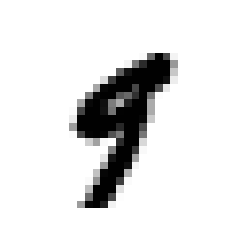

In [93]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [94]:
plt.show()

In [95]:
y[36000]

'9'

In [96]:
x_train, x_test= x[:60000], x[60000:]

In [97]:
y_train, y_test= y[:60000], y[60000:]

In [98]:
#shuffling the training set- we are doing this to get random numbers to get all numbers because they are arranged in some order and to disrupt it:
import numpy as np
shuffle_index= np.random.permutation(60000)


In [99]:
shuffle_index=True

In [100]:
#creating a 2 detector
#training a binary classifier
y_train= y_train.astype(np.int8)
y_test= y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [101]:
y_train_2

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [102]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [103]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int8

In [104]:
#using a classifier
from sklearn.linear_model import LogisticRegression



In [105]:
clf=  LogisticRegression(tol=0.1, solver='lbfgs')

In [106]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [107]:
clf.predict([some_digit])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [108]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [109]:
a.mean()

0.9781

In [110]:
#accuracy is a classification matrix
#measuring accuracy using cross-validation


In [111]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [112]:
skfolds= StratifiedKFold(n_splits=3, random_state=None)

for train_index, test_index in skfolds.split(x_train, y_train_2):
  clone_clf= clone(clf)
  x_train_folds= x_train.iloc[train_index]
  y_train_folds= (y_train_2.iloc[train_index])
  x_test_fold= x_train.iloc[test_index]
  y_test_fold= (y_train_2.iloc[test_index])


  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred= clone_clf.predict(x_test_fold)
  n_correct= sum(y_pred== y_test_fold)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9769


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.97725
0.98015


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
#using cross_val_score 
from sklearn.model_selection import cross_val_score

In [114]:
cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.9769 , 0.97725, 0.98015])

In [115]:
from sklearn.base import BaseEstimator

In [117]:
class Never5Classifier(BaseEstimator):
  def fit(self, x, y=None):
    pass
  def predict(self, x):
    return np.zeroes((len (x), 1), dtype= bool)

In [118]:

never_5_clf= Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_2, cv=3, scoring="accuracy")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "<ipython-input-117-810a3e261a0b>", line 5, in predict
    return np.zeroes((len (x), 1), dtype= bool)
  File "/usr/local/lib/python

array([nan, nan, nan])

In [ ]:
#what is accuracy?
# accuracy score= no of correct pred/ total preds


In [3]:
from google.colab import files
uploaded= files.upload()



Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [1]:
import pandas as pd

In [4]:
df= pd.read_csv('heart_cleveland_upload.csv')

In [5]:
df.shape

(297, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2, random_state=2)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()

In [10]:
#making 2 objects and training them over same data
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [11]:
#predicitions through x test on model 1 and 2
y_pred1= clf1.predict(X_test)
y_pred2= clf2.predict(X_test)

In [12]:
#using accuracy score comparing the accuracy of 2 models
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression ",accuracy_score(Y_test,y_pred1))
print("Accuracy of Decision Trees ",accuracy_score(Y_test,y_pred2))

Accuracy of Logistic Regression  0.85
Accuracy of Decision Trees  0.7333333333333333


In [ ]:
'''how much accuracy is good?
it depends on the prob we are solving. 95% accuracy is not always correct.
different data and diff probs have diff accuracy bars.'''



'''what is the prob with accuracy?
the accuracy score is just a number, it does not give us the type of the errors produced. 
for ex. in a binary classification, if class1 has student placed and class2 has student not placed. the accuracy score is 90%
now the 10% error could be of 2 types: the student got placed but the model said not placed
                                      second,  the student was not placed but the model said placed
the accuracy score does not tell us how much errors are of type1/type2. it will only tell us that there is an error.

this prob of not being able to rectify the error is solved with the help of another classification matric called CONFUSION MATRIX.
'''

'what is the prob with accuracy?\nthe accuracy score is just a number, it does not give us the type of the errors produced. \nfor ex. in a binary classification, if class1 has student placed and class2 has student not placed. the accuracy score is 90%\nnow the 10% error could be of 2 types: the student got placed but the model said not placed\n                                      second,  the student was not placed but the model said placed\nthe accuracy score does not tell us how much errors are of type1/type2. it will only tell us that there is an error.\n\nthis prob of not being able to rectify the error is solved with the help of another classification matric called CONFUSION MATRIX.\n'

In [ ]:
#CONFUSION MATRIX.


In [13]:
df= pd.read_csv('heart_cleveland_upload.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2, random_state=2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()

In [18]:
#making 2 objects and training them over same data
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [19]:
#predicitions through x test on model 1 and 2
y_pred1= clf1.predict(X_test)
y_pred2= clf2.predict(X_test)

In [20]:
#using accuracy score comparing the accuracy of 2 models
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy of Logistic Regression ",accuracy_score(Y_test,y_pred1))
print("Accuracy of Decision Trees ",accuracy_score(Y_test,y_pred2))

Accuracy of Logistic Regression  0.85
Accuracy of Decision Trees  0.75


In [25]:
pd.DataFrame(confusion_matrix(Y_test, y_pred1),columns=['yes','no'])
#basically, it is a way to tell the amounts of type1/type2 errors produced by the model.

,yes,no
0,27,1
1,8,24


In [ ]:
#using the confusion matrix we can find the accuracy score the reverse is not possible.
#accuracy from confusion matrix:   TP+TN/TP+TN+FP+FN

In [ ]:
#confusion matrix for multi classification problem


In [26]:
from google.colab import files
uploaded= files.upload()

Saving Iris.csv to Iris.csv


In [27]:
import pandas as pd
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2, random_state=2)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [30]:
clf11= LogisticRegression()
clf12=  DecisionTreeClassifier()

In [31]:
#making objects 
clf11.fit(X_train,Y_train)
clf12.fit(X_train,Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [32]:
#predict using x test

y_pred1= clf11.predict(X_test)
y_pred2= clf12.predict(X_test)

In [33]:
#accuracy 
from sklearn.metrics import accuracy_score
print("accuracy of LogisticRegression ",accuracy_score(Y_test, y_pred1))
print("accuracy of Decision trees ",accuracy_score(Y_test, y_pred2))



accuracy of LogisticRegression  1.0
accuracy of Decision trees  1.0


In [34]:
#making confusion matrix
print("Logistic Regression confusion matrix\n")
pd.DataFrame(confusion_matrix(Y_test,y_pred1),columns=[df['Species'].unique()])

Logistic Regression confusion matrix



,Iris-setosa,Iris-versicolor,Iris-virginica
0,14,0,0
1,0,8,0
2,0,0,8


In [35]:
#.unique is used to display the uniqueness of the column
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
print("Decision Trees confusion matrix\n")
pd.DataFrame(confusion_matrix(Y_test,y_pred2),columns=list(range(0,3)))

Decision Trees confusion matrix



,0,1,2
0,14,0,0
1,0,8,0
2,0,0,8


In [ ]:
#confusion matrix and accuracy score for a mnist dataset
from google.colab import files
uploading= files.upload()

Saving ML mnist dataset.csv to ML mnist dataset.csv


In [ ]:
import pandas as pd
dff= pd.read_csv('ML mnist dataset.csv')

In [ ]:
dff.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train test and split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(dff.iloc[:,1:],dff.iloc[:,0],test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf0=LogisticRegression()
clf00=DecisionTreeClassifier()

In [ ]:
clf0.fit(X_train,Y_train)
clf00.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [ ]:
#predict using x test

y_pred1= clf0.predict(X_test)
y_pred2= clf00.predict(X_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
print("accuracy of LogisticRegression ",accuracy_score(Y_test, y_pred1))
print("accuracy of Decision trees ",accuracy_score(Y_test, y_pred2))

accuracy of LogisticRegression  0.888
accuracy of Decision trees  0.815


In [ ]:
#making confusion matrix
print("Logistic Regression confusion matrix\n")
confusion_matrix(Y_test,y_pred1)

Logistic Regression confusion matrix



,0,1,2,3,4,5,6,7,8,9
0,206,0,1,1,0,6,0,0,0,1
1,0,231,2,1,0,1,0,3,1,0
2,1,0,182,4,0,2,4,4,10,2
3,0,0,4,168,0,8,0,1,5,0
4,1,0,3,2,166,1,3,2,3,8
5,1,0,2,13,2,123,2,2,13,4
6,3,1,3,0,2,6,180,1,0,0
7,2,2,7,3,3,1,0,202,2,3
8,1,1,8,7,0,9,4,0,156,8
9,1,0,4,4,9,1,0,3,1,162


In [ ]:
print("confusion matrix for decision trees\n")
pd.DataFrame(confusion_matrix(Y_test,y_pred2),columns=list(range(0,10)))





confusion matrix for decision trees



,0,1,2,3,4,5,6,7,8,9
0,184,0,5,1,1,7,9,0,5,3
1,0,222,3,4,0,2,1,0,5,2
2,2,1,162,9,5,4,5,11,9,1
3,0,1,1,160,0,11,1,2,7,3
4,3,4,5,0,143,3,4,1,6,20
5,6,1,1,10,4,122,6,3,6,3
6,5,2,5,1,4,7,156,3,9,4
7,2,1,7,6,4,3,0,189,1,12
8,2,1,5,12,5,6,2,6,144,11
9,1,0,1,5,14,5,1,4,6,148


In [ ]:
#accuracy of confusion matrix:
# accuracy= sum of all diagonal (true) values/ total values

In [ ]:
#when is accuracy misleading?
#imbalanced dataset
#due to this misleading we study two another metrics called precision and recall.

In [ ]:
'''
precision- the proportion of predicted positives to total positives. Precision quantifies the number of positive class 
predictions that actually belong to the positive class. 
 
when to use precision?
when the accuracy of two models is exactly the same, then the deciding factor becomes the precision/recall.

formula:
precision= true positives/ sum of true positives and false positives'''


'\nprecision- the proportion of predicted positives to actual positives.\n OR jitni chizo ko apne positive bola hai usme se kitni sach me positive hai\n\nwhen to use precision?\nwhen the accuracy of two models is exactly the same, then the deciding factor becomes the precision.\n\nformula:\nprecision= true positives/ sum of true positives and false positives'

In [ ]:
'''
recall- the proportion of predicted positives to true positives and false negatives.
Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.


formula:
recall= true positives/ sum of true positives and false negatives'''

#agr type 2 wali galtiya zyada khatarnak hai to aap recall choose karenge, agr type 1 wali galtiya zyada khatarnak hai to aap recall choose karenge.

'''what are type 1 and type 2 error:
the false positive is known as the type 1 error.
the false negative is known as the type 2 error.
'''

'what are type 1 and type 2 error:\nthe false positive is known as the type 1 error.\nthe false negative is known as the type 2 error.\n'

In [ ]:
#now, for example you have a problem where you dont know which is more dangerous type1/type2 error, at that time we go for F1_score.

'''
formula:
F1 score= 2PR/P+R

this basically is the harmonic mean, which implies that it is always moves towards the lower side. for ex, P=100,R=0 so it is towards R
since it is a lower value. this is harmonic mean.

we are using harmonic mean here to make them equal.

'''

'\nformula:\nF1 score= 2PR/P+R\n\nthis basically is the harmonic mean, which implies that it is always moves towards the lower side. for ex, P=100,R=0 so it is towards R\nsince it is a lower value. this is harmonic mean.\n\nwe are using harmonic mean here to make them equal.\n\n'

In [36]:
#using precision, recall and F1 score
#multi class classification
from google.colab import files
uploaded= files.upload()

Saving framingham_heart_disease.csv to framingham_heart_disease.csv


In [37]:
import pandas as pd
df1=pd.read_csv('framingham_heart_disease.csv')
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [38]:
df1.drop(['education'],axis=1,inplace=True)
df1.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
df1.rename(columns={'male':'Sex_male'},inplace=True)

In [40]:
# missing values
df1.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [41]:
df1.dropna(axis=0,inplace=True)

In [42]:
df1.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2, random_state=2)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [45]:
clfx= LogisticRegression()
clfy= DecisionTreeClassifier()

In [46]:
clfx.fit(x_train,y_train)
clfy.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [47]:
y_predx= clfx.predict(x_test)
y_predr= clfy.predict(x_test)


In [48]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
'''
for multi class classification
 if the ratio of precisions of all classes are balanced, then 1) we use macro precision
macro precision - The macro average is the arithmetic mean of the individual class related to precision, memory, and f1 score. We use macro average scores 
when we need to treat all classes equally to evaluate the overall performance of the classifier against the most common class labels.


 if the ratio of precisions of all classes are highly imbalanced, then 1) we use weighted precision
weighted precision - it basically  combines the predictions from multiple models, 
where the contribution of each model is weighted proportionally to its capability or skill.
so if i had data for multiclass classification but i wanted to do binary, it will combine the classes.

similarly, we have weighted/macro recall and f1 score 
'''
 

In [56]:
print('for LogisticRegression model: ')
print('-'*50)
f= pd.DataFrame(confusion_matrix(y_test,y_predx))
print(f)
print('-'*50)
print('precision= ',precision_score(y_test,y_predx,average='weighted'))
print('recall= ',recall_score(y_test,y_predx,average='weighted'))
print('f1 score= ',f1_score(y_test,y_predx,average='weighted'))

for LogisticRegression model: 
--------------------------------------------------
    0  1  2
0  14  0  0
1   0  8  0
2   0  0  8
--------------------------------------------------
precision=  1.0
recall=  1.0
f1 score=  1.0


In [58]:
print('for decision tree model: ')
print('-'*50)
f= pd.DataFrame(confusion_matrix(y_test,y_predr))
print(f)
print('-'*50)
print('precision= ',precision_score(y_test,y_predr,average='weighted'))
print('recall= ',recall_score(y_test,y_predr,average='weighted'))
print('f1 score= ',f1_score(y_test,y_predr,average='weighted'))

for decision tree model: 
--------------------------------------------------
    0  1  2
0  14  0  0
1   0  8  0
2   0  0  8
--------------------------------------------------
precision=  1.0
recall=  1.0
f1 score=  1.0


In [60]:
#using average='macro'
print('for decision tree model: ')
print('-'*50)
f= pd.DataFrame(confusion_matrix(y_test,y_predr))
print(f)
print('-'*50)
print('precision= ',precision_score(y_test,y_predr,average='macro'))
print('recall= ',recall_score(y_test,y_predr,average='macro'))
print('f1 score= ',f1_score(y_test,y_predr,average='macro'))

for decision tree model: 
--------------------------------------------------
    0  1  2
0  14  0  0
1   0  8  0
2   0  0  8
--------------------------------------------------
precision=  1.0
recall=  1.0
f1 score=  1.0


In [63]:
#to get the precision, recall ,f1 score for every class
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
'''ROC curve and AUC curve
 - mostly used for binary classification problems 
 - the Y axis is converted from 0 to 1. we set a threshold at 0.5, any value more than 0.5 will be considered 1 and less than 0.5 will be considered 0.
 - a higher threshold gives better results at classfying samples.
 - the RECEIVER OPERATOR GRAPHS provides a simple way to summarize all of the information.
 - graph of true positive rate vs false positive rate  OR sensitivity vs 1-specificity
 - we create a diagonal line in between which shows, true positive rate = false positive rate
 - AUC is the area under the curve
 - the AUC makes it easier to compare one ROC curve to another.
 - more the area under the curve, the better.



'''

In [ ]:
'''
true positive rate- TP/TP+FN        (sensitivity)

false positive rate- FP/FP+TN       (1-specificity)

true negative rate- TN/TN+FP        (specificity)

false negative rate- FN/FN+TP
'''

In [1]:
#using roc curve
from google.colab import files
uploaded= files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [2]:
import pandas as pd
my_file= pd.read_csv('heart_cleveland_upload.csv')
my_file.shape

(297, 14)

In [3]:
my_file.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
#segregrating the values into x and y
x= my_file.iloc[:,:-1].values
x

array([[69.,  1.,  0., ...,  1.,  1.,  0.],
       [69.,  0.,  0., ...,  0.,  2.,  0.],
       [66.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [35.,  1.,  3., ...,  1.,  0.,  2.],
       [35.,  0.,  3., ...,  0.,  0.,  0.],
       [35.,  1.,  3., ...,  0.,  0.,  2.]])

In [5]:
y= my_file.iloc[:,-1].values
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [6]:
#train,test,split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
stdslr= StandardScaler()


In [8]:
x_train= stdslr.fit_transform(x_train)
x_test= stdslr.transform(x_test)

In [19]:
#creating a classifier
from sklearn.linear_model import LogisticRegression

model_logistic= LogisticRegression()
model_logistic.fit(x_train, y_train)




LogisticRegression()

In [20]:
y_pred=model_logistic.predict(x_test)

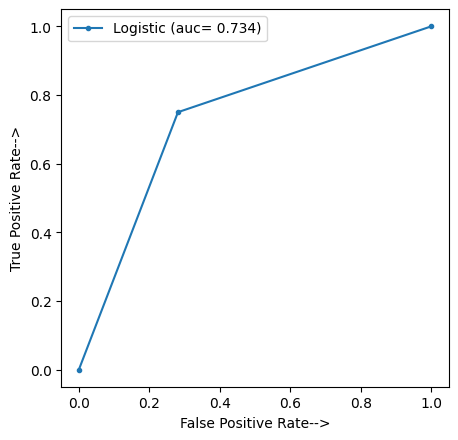

In [21]:
#plotting the ROC and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,y_pred)
auc_logistic= auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.',label='Logistic (auc= %0.3f)'% auc_logistic)

plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')

plt.legend()
plt.show()

In [16]:
#comparing auc between two classifiers
from sklearn.svm import SVC
model_svc= SVC(kernel='rbf',random_state=4)
model_svc.fit(x_train,y_train)
y_pred3= model_svc.decision_function(x_test)

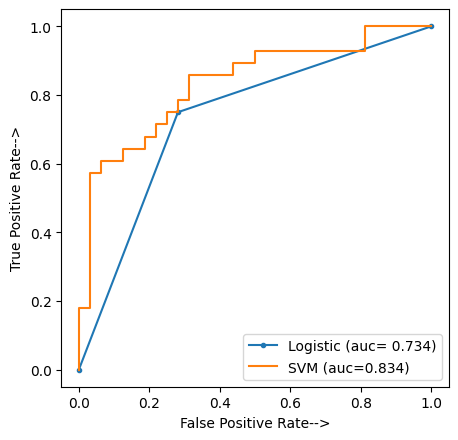

In [22]:
#plotting and comparing auc
from sklearn.metrics import roc_curve,auc

logistic_fpr, logistic_tpr, threshold= roc_curve(y_test,y_pred)
auc_logistic= auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold= roc_curve(y_test,y_pred3)
auc_svm= auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.',label='Logistic (auc= %0.3f)'% auc_logistic)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc=%0.3f)' %auc_svm)

plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')

plt.legend()
plt.show()

In [ ]:
'''
recall/precision tradeoff- relationship between recall and precision.

more the precision : TPR/TPR+FPR which means if we have binary classification for cancer or not then it is less dangerous if someone did not had cancer 
but the model predicted it.

lower recall: TPR/TPR+FNR which means it is highly dangerous if the patient had cancer and the model didn't detect it.


so if someone said, my model has 95% precision, you must also ask at what recall?
'''

In [47]:
#using the same roc curve dataset
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict


In [48]:
y_score=cross_val_predict(model_logistic, x_train, y_train, cv=3, method='decision_function')

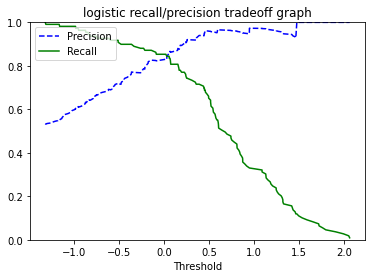

In [60]:
precision, recall, threshold= precision_recall_curve(y_train,y_score)

def plot_precision_recall_vs_threshold(precision,recall,threshold):
  plt.plot(threshold,precision[:-1],'b--',label='Precision')
  plt.plot(threshold,recall[:-1],'g-',label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])
  plt.title('logistic recall/precision tradeoff graph')

plot_precision_recall_vs_threshold(precision,recall,threshold)
plt.show()

In [52]:
y_score=cross_val_predict(model_svc, x_train, y_train, cv=3, method='decision_function')

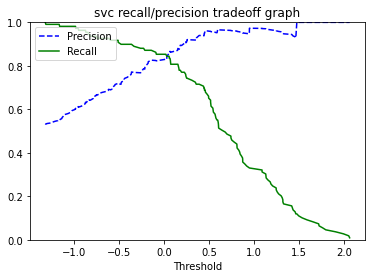

In [59]:
precision, recall, threshold= precision_recall_curve(y_train,y_score)

def plot_precision_recall_vs_threshold(precision,recall,threshold):
  plt.plot(threshold,precision[:-1],'b--',label='Precision')
  plt.plot(threshold,recall[:-1],'g-',label='Recall')
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])
  plt.title('svc recall/precision tradeoff graph')

plot_precision_recall_vs_threshold(precision,recall,threshold)
plt.show()

In [ ]:

'''
what is multilabel classification? // more than one label
If we are making an animal classifier that classifies between Dog, Rabbit, Cat, and Tiger,
it makes sense only for one of these classes to be selected each time. this is multi-CLASS classification.

If we are building a model which predicts all the clothing articles a person is wearing,
we can use a multi-label classification model since there can be more than one possible option at once. 
this is multi-LABEL classification.
'''